# Example 2: Dataframes

This Example demonstrates the capabilities of the class Dataframes_SIR3S_Model that extends SIR3S_Model be abilities to work directley with pandas dataframes.  

# Toolkit Release

In [1]:
#pip install 

# Imports

## SIR 3S Toolkit

### Regular Import/Init

In [2]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64" #change to local path

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
wrapper

<module 'sir3stoolkit.core.wrapper' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\core\\wrapper.py'>

In [5]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional Import/Init for Dataframes class

from sir3stoolkit.mantle import dataframe

We can just import the whole mantle to get all higher level modeling functions.

In [6]:
from sir3stoolkit.mantle import mantle

In [7]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


In [8]:
from sir3stoolkit.mantle import mantle

In [9]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


## Additional

In [10]:
import pandas as pd
from shapely.geometry import Point
import re
import folium
from folium.plugins import HeatMap
import numpy as np
import geopandas as gpd
from shapely import wkt

# Open Model

In [11]:
s3s.OpenModel(dbName=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example3.db3",
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Error while opening the model, Could not find any Model 'M-1-0-1'


# Prepare Data

## District Heating Consumer

### Metadata

In [12]:
df_consumer_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.DistrictHeatingConsumer, properties=[], geometry=True)

[2025-10-17 12:10:08,849] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-10-17 12:10:08,860] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 0 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-10-17 12:10:08,881] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 0 metadata properties.
[2025-10-17 12:10:08,881] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving geometry...
[2025-10-17 12:10:08,881] INFO in sir3stoolkit.mantle.dataframes: [metadata] 0 non-empty end node columns were created)
[2025-10-17 12:10:08,886] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (0, 0)


In [13]:
df_consumer_metadata.head(3)

""


### Result Data

In [14]:
df_consumer_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.DistrictHeatingConsumer, ["W"])

[2025-10-17 12:10:08,969] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-10-17 12:10:08,971] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-10-17 12:10:09,001] WARNING in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No valid timestamps found. Proceeding with empty timestamp list.
[2025-10-17 12:10:09,006] WARNING in sir3stoolkit.mantle.dataframes: [results] No valid timestamps. Returning empty dataframe.


Error : Object Model not set yet.


In [15]:
df_consumer_results.head(3)

,timestamp,tk


### Merge

In [16]:
df_consumer = pd.merge(
    df_consumer_metadata,
    df_consumer_results,
    on="tk",
    how="outer"
)

KeyError: 'tk'

In [ ]:
df_consumer.head(3)

,tk,geometry,timestamp,W
0,4611752310942477664,POINT (713675.30023234 5578705.1927566),2023-02-13 00:00:00.000 +01:00,39.3675
1,4611752310942477664,POINT (713675.30023234 5578705.1927566),2023-02-13 01:00:00.000 +01:00,39.83363
2,4611752310942477664,POINT (713675.30023234 5578705.1927566),2023-02-13 02:00:00.000 +01:00,40.48209


## Pipes

### Metadata

In [ ]:
df_pipes_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.Pipe, properties=["DN", "Kvr"], geometry=True, end_nodes=True)

[2025-10-17 11:58:23,709] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-10-17 11:58:23,713] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 524 element(s) of element type ObjectTypes.Pipe.
[2025-10-17 11:58:23,714] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 2 metadata properties.
[2025-10-17 11:58:23,716] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN', 'Kvr'], geometry, end nodes...
[2025-10-17 11:58:23,824] INFO in sir3stoolkit.mantle.dataframes: [metadata] 2 non-empty end node columns were created)
[2025-10-17 11:58:23,828] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (524, 6)


In [ ]:
df_pipes_metadata.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK
0,5442010239090746007,150,1,"LINESTRING (713620.267807079 5578828.41875394,...",5669301360686511351,5397948523091900401
1,4917786378639043296,125,1,"LINESTRING (713602.294599536 5578860.10567987,...",5397948523091900401,5239335112004772156
2,4762482310382009633,125,1,"LINESTRING (713574.061626605 5578909.87290685,...",5239335112004772156,5298886695042021307


### Result data

In [ ]:
df_pipes_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.Pipe, ["QMAV"])

[2025-10-17 11:58:23,855] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Pipe
[2025-10-17 11:58:23,856] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-10-17 11:58:23,917] INFO in sir3stoolkit.mantle.dataframes: 25 simulation timestamps will be used.
[2025-10-17 11:58:23,987] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamps will be used.
[2025-10-17 11:58:23,995] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 524 tks.
[2025-10-17 11:58:23,998] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-10-17 11:58:23,998] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-10-17 11:58:25,255] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (13100, 3)


In [ ]:
df_pipes_results.head(3)

,timestamp,tk,QMAV
0,2023-02-13 00:00:00.000 +01:00,5442010239090746007,52.84819
1,2023-02-13 00:00:00.000 +01:00,4917786378639043296,29.67386
2,2023-02-13 00:00:00.000 +01:00,4762482310382009633,30.2523


In [ ]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].astype(float)

In [ ]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].abs()

In [ ]:
df_pipes_results=df_pipes_results.rename(columns={"QMAV": "QMAVAbs"})

### Merge

In [ ]:
df_pipes = pd.merge(
    df_pipes_metadata,
    df_pipes_results,
    on="tk",
    how="outer"
)

In [ ]:
df_pipes=df_pipes[df_pipes["Kvr"] == "1"]

In [ ]:
df_pipes.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK,timestamp,QMAVAbs
25,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 00:00:00.000 +01:00,3.667083e-10
26,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 01:00:00.000 +01:00,1.440640e-09
27,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 02:00:00.000 +01:00,1.414446e-09


### Plotting Constants

In [ ]:
def parse_point_string(s):
    # Extract numbers from the string using regex
    match = re.match(r'POINT\s*\(\s*([-\d\.]+)\s+([-\d\.]+)\s*\)', s)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        return Point(x, y)
    else:
        return None

In [ ]:
df_consumer['geometry'] = df_consumer['geometry'].apply(parse_point_string)

x_mean = df_consumer['geometry'].apply(lambda p: p.x if p else None).mean()
y_mean = df_consumer['geometry'].apply(lambda p: p.y if p else None).mean()

### Change datatypes

In [ ]:

df_pipes['DN'] = pd.to_numeric(df_pipes['DN'], errors='coerce')
df_pipes['QMAVAbs'] = pd.to_numeric(df_pipes['QMAVAbs'], errors='coerce')


### Filter rows

In [ ]:
df_pipes = df_pipes[df_pipes['DN'] != 999]

### Turn into gdf

In [ ]:
df_pipes['geometry'] = df_pipes['geometry'].apply(wkt.loads)

In [ ]:
gdf_pipes = gpd.GeoDataFrame(df_pipes, geometry='geometry')

In [ ]:
gdf_pipes=gdf_pipes.set_crs(epsg=4326, inplace=True)

In [ ]:
gdf_pipes.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK,timestamp,QMAVAbs
75,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 00:00:00.000 +01:00,86.89403
76,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 01:00:00.000 +01:00,87.91040
77,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 02:00:00.000 +01:00,89.32416


In [ ]:
import matplotlib.pyplot as plt

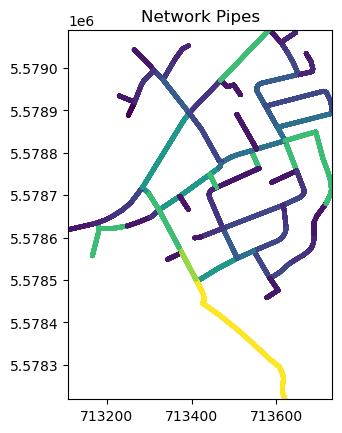

In [ ]:
layer = s3s.create_pipe_layer(
    gdf=gdf_pipes,
    geometry_col="geometry",
    #width_scaling_col="DN",    # example
    color_mixing_col="DN",    
    cmap="viridis",
)

ax = layer["axes"]
# Optional colorbar if you used color_mixing_col:
if layer["norm"] is not None:
    plt.colorbar(layer["artist"], ax=ax, label="Flow [kg/s]")
plt.title("Network Pipes")
plt.show()